# Support Vector Machine Classifier
# Training the Model on Training Dataset

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
df_train = pd.read_csv("D:/Desktop/Assignments/Assignment17/SalaryData_Train(1).csv")
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# Checking Some Statistics Parameter for numberical Columns

df_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


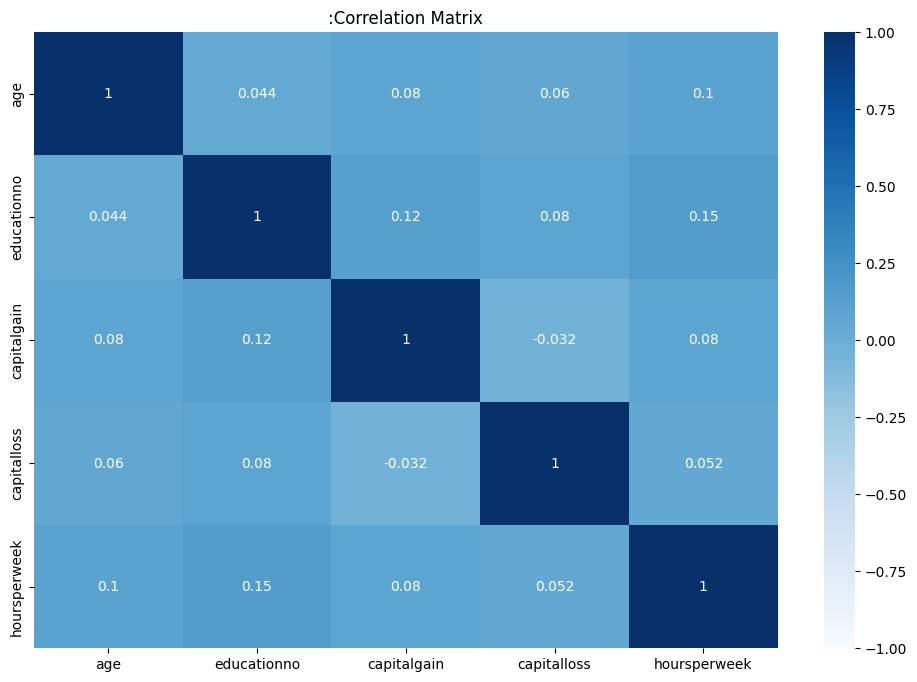

In [8]:
# Finding the Correlation between Numerical column
plt.figure(figsize=(12,8))
plt.title(":Correlation Matrix")
sns.heatmap(df_train[['age','educationno','capitalgain','capitalloss','hoursperweek']].corr(),annot=True,vmax=1,vmin=-1,cmap="Blues")
plt.show()


In [9]:
# Checking the Data Type of the columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [10]:
# Checking the Null Values

df_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
df_train[df_train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [12]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
df_train = df_train.drop_duplicates()

In [14]:
df_train.head()
df_train.shape

(26903, 14)

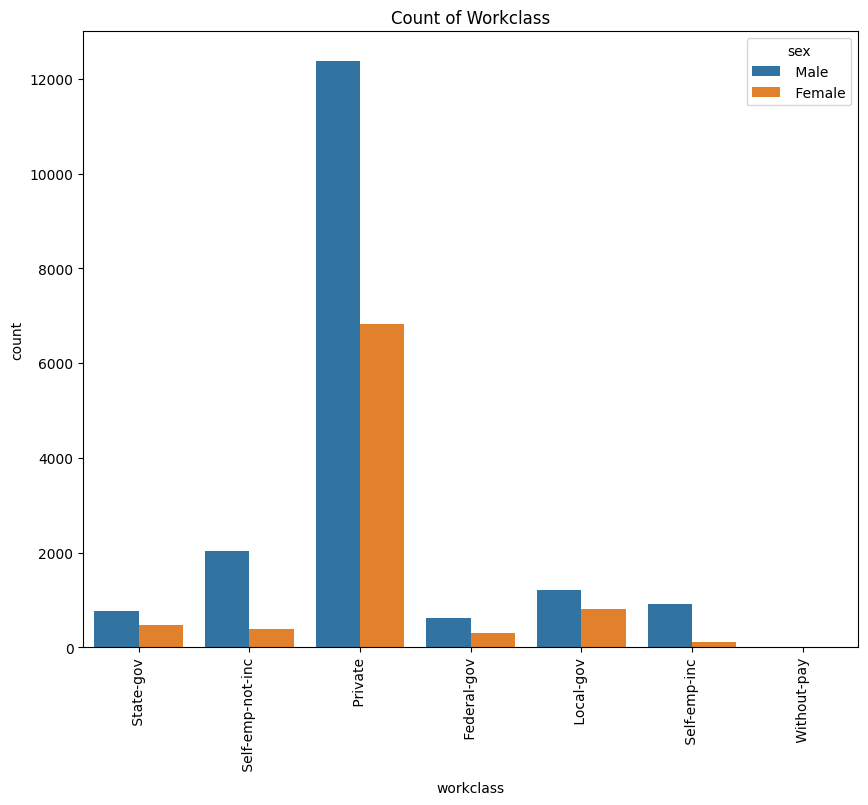

In [15]:
# Perfomring EDA Technique
# Checking Count of Each Column value

# Count of Employees workclass on the basis of Male and Female

plt.figure(figsize=(10,8))
plt.xlabel("WrokClasses")
plt.ylabel("Count_of_Workclass")
plt.title("Count of Workclass")
plt.xticks(rotation=90)
sns.countplot(x = df_train['workclass'],data=df_train,hue=df_train['sex'])
plt.show()


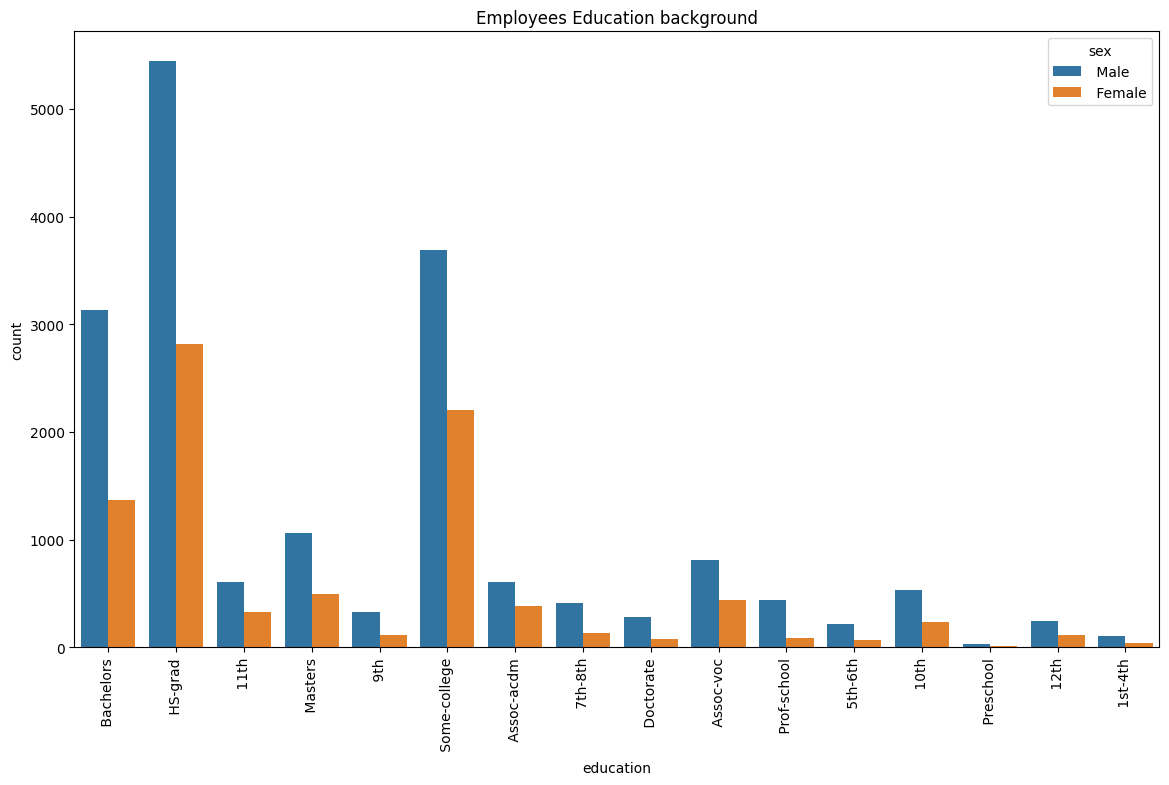

In [16]:
# Count of Employees Education background on the basis of Gender

plt.figure(figsize=(14,8))
plt.xlabel("Education Titles")
plt.ylabel("Frequency_of Employees")
plt.title("Employees Education background")
plt.xticks(rotation=90)
sns.countplot(x = df_train['education'],data=df_train,hue=df_train['sex'])
plt.show()

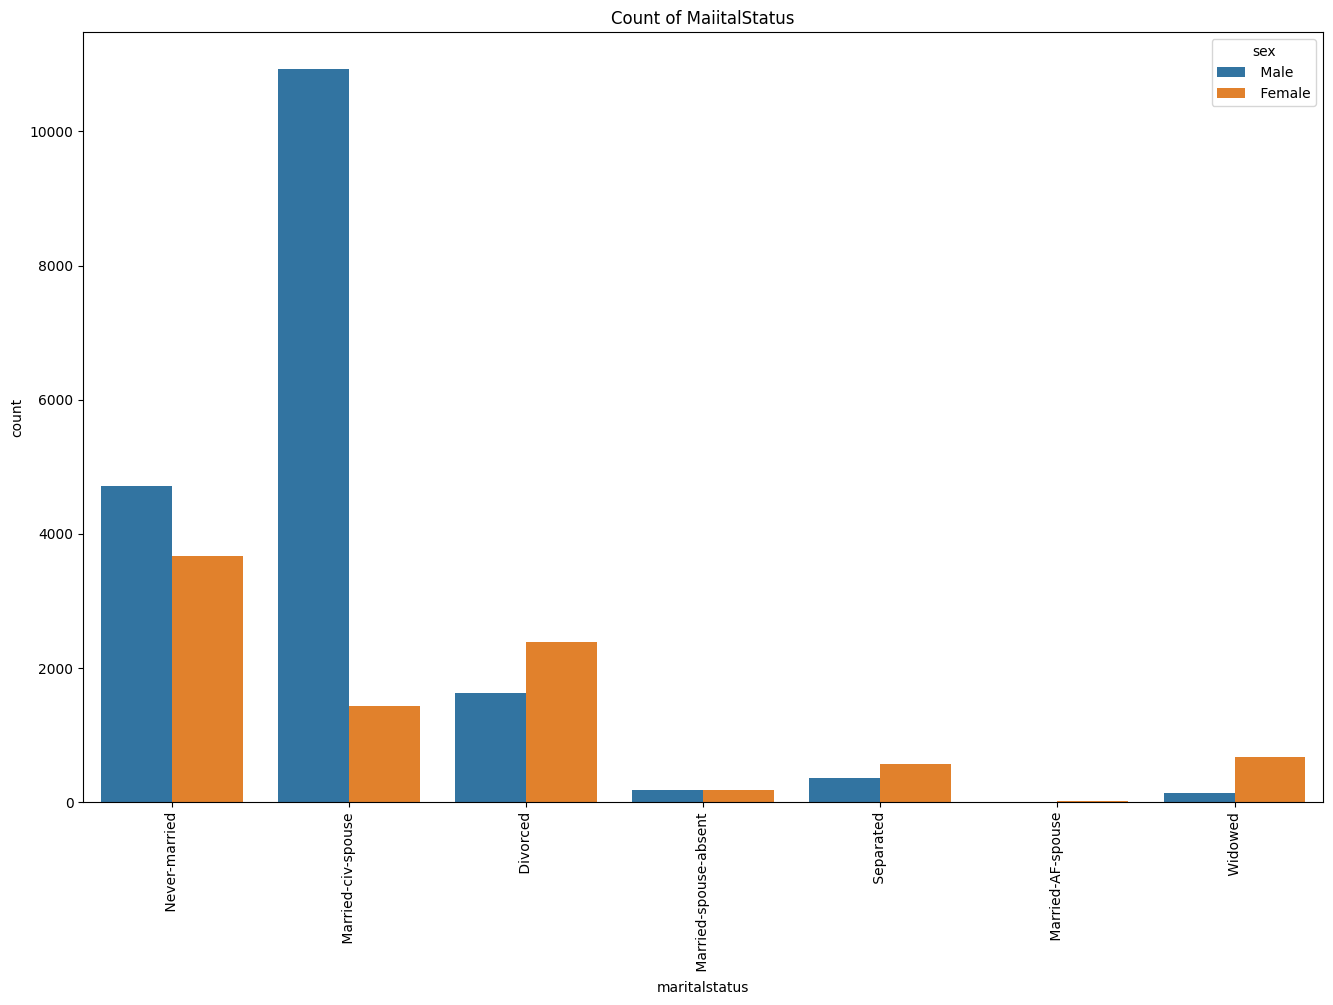

In [17]:
# Count of Employees  maritalStatus on basis of Male and Female

plt.figure(figsize=(16,10))
plt.xlabel("MaritalStatus")
plt.ylabel("Number_of_counts")
plt.title("Count of MaiitalStatus")
plt.xticks(rotation=90)
sns.countplot(data = df_train,x = df_train['maritalstatus'],hue=df_train['sex'])
plt.show()

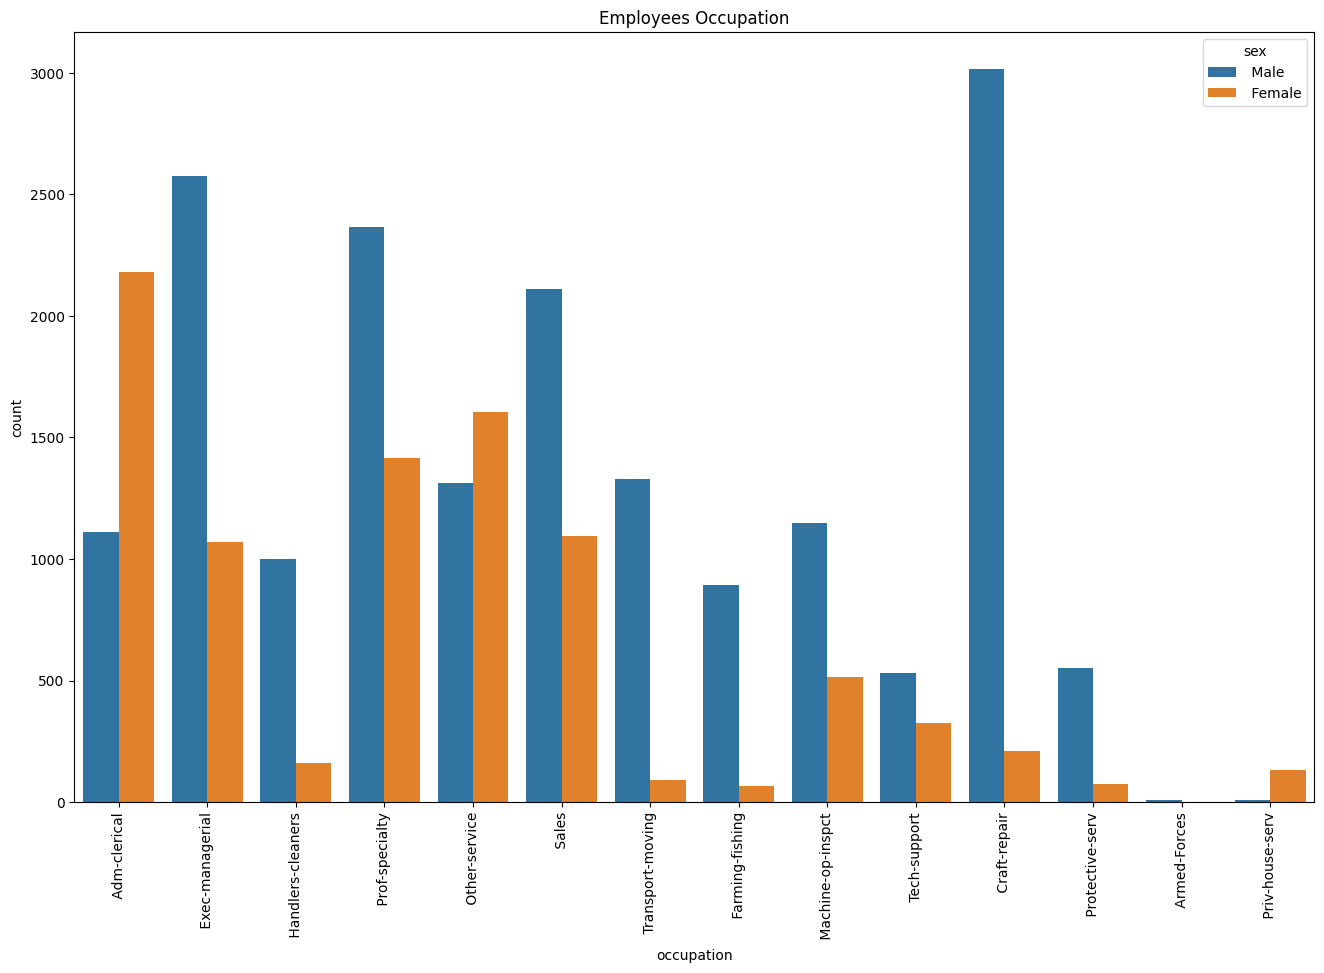

In [18]:
# Count of Employees Occupation on the basis of Gender

plt.figure(figsize=(16,10))
plt.xlabel("Type of Occupation")
plt.ylabel("Occupation Frequency Count")
plt.title("Employees Occupation")
plt.xticks(rotation=90)
sns.countplot(data = df_train,x = df_train['occupation'],hue=df_train['sex'])
plt.show()


In [19]:
# Preprocesing the Data
# Encoding the value of the columns from 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [20]:
"""
Encoding The Categorical Values of the columns to Numerical
OneHotEncoder is used to encode the Nominal Data. the data which can be organised but cannot be ranked in Sequence
So In our dataset we have only one Nominal Datatype column is Sex column.
OrdinalEncoder is used to encod the Ordinal Data. the Which can be Organised and can be ranked on the basis of there quantity
All the Categorical column in our dataset are OridnalData except Sex Column
Label Encoder is used Encode the Label or the Output column from categorical to Numerical

"""

'\nEncoding The Categorical Values of the columns to Numerical\nOneHotEncoder is used to encode the Nominal Data. the data which can be organised but cannot be ranked in Sequence\nSo In our dataset we have only one Nominal Datatype column is Sex column.\nOrdinalEncoder is used to encod the Ordinal Data. the Which can be Organised and can be ranked on the basis of there quantity\nAll the Categorical column in our dataset are OridnalData except Sex Column\nLabel Encoder is used Encode the Label or the Output column from categorical to Numerical\n\n'

In [21]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [22]:
# Encoding Sex column using OneHotEncoder

encod = OneHotEncoder(sparse_output=False,handle_unknown="ignore",drop='first')
df_train['sex'] = encod.fit_transform(df_train[['sex']])
df_train['sex'].value_counts()

sex
1.0    17961
0.0     8942
Name: count, dtype: int64

In [23]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1.0,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1.0,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1.0,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1.0,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0.0,0,0,40,Cuba,<=50K


In [24]:
# Encoding workclass column using OrdinalEncoder

ord_encode = OrdinalEncoder(categories=[[' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay']])

df_train['workclass'] = ord_encode.fit_transform(df_train[['workclass']])
df_train['workclass'].value_counts()

workclass
2.0    19213
1.0     2431
4.0     2014
0.0     1253
5.0     1049
3.0      929
6.0       14
Name: count, dtype: int64

In [25]:
# Encoding the output Column using Label Encoder

lab_encoder = LabelEncoder()
df_train['Salary'] = lab_encoder.fit_transform(df_train['Salary'])
df_train['Salary'].value_counts()

Salary
0    20023
1     6880
Name: count, dtype: int64

In [26]:
# Encoding relationship and maritalstatus

rel_encode = OrdinalEncoder(categories=[[' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative']])

df_train['relationship'] = rel_encode.fit_transform(df_train[['relationship']])

marital_encode = OrdinalEncoder(categories=[[' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed']])
df_train['maritalstatus'] = marital_encode.fit_transform(df_train[['maritalstatus']])

In [27]:
# Encoding Educationa and Occupation column

edu_encode = OrdinalEncoder(categories=[[' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th']])
df_train['education'] = edu_encode.fit_transform(df_train[['education']])

occu_encoder = OrdinalEncoder(categories=[[' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv']])
df_train['occupation'] = occu_encoder.fit_transform(df_train[['occupation']])

# Map function is used to map the data through custom values
# like i have assign canada as 40 which is at the 9th postion

df_train['native'] = df_train['native'].map({' United-States':1, ' Cuba':2, ' Jamaica':3, ' India':4, ' Mexico':5,
       ' Puerto-Rico':6, ' Honduras':7, ' England':8, ' Canada':40, ' Germany':9,
       ' Iran':10, ' Philippines':11, ' Poland':12, ' Columbia':13, ' Cambodia':14,
       ' Thailand':15, ' Ecuador':16, ' Laos':17, ' Taiwan':18, ' Haiti':19, ' Portugal':20,
       ' Dominican-Republic':21, ' El-Salvador':22, ' France':23, ' Guatemala':24,
       ' Italy':25, ' China':26, ' South':27, ' Japan':28, ' Yugoslavia':29, ' Peru':30,
       ' Outlying-US(Guam-USVI-etc)':31, ' Scotland':32, ' Trinadad&Tobago':33,
       ' Greece':34, ' Nicaragua':35, ' Vietnam':36, ' Hong':37, ' Ireland':38,
       ' Hungary':39})


In [28]:
# Encoding of race column

col_ord = OrdinalEncoder(categories=[[' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other']])

df_train['race'] = col_ord.fit_transform(df_train[['race']])

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26903 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            26903 non-null  int64  
 1   workclass      26903 non-null  float64
 2   education      26903 non-null  float64
 3   educationno    26903 non-null  int64  
 4   maritalstatus  26903 non-null  float64
 5   occupation     26903 non-null  float64
 6   relationship   26903 non-null  float64
 7   race           26903 non-null  float64
 8   sex            26903 non-null  float64
 9   capitalgain    26903 non-null  int64  
 10  capitalloss    26903 non-null  int64  
 11  hoursperweek   26903 non-null  int64  
 12  native         26903 non-null  int64  
 13  Salary         26903 non-null  int32  
dtypes: float64(7), int32(1), int64(6)
memory usage: 3.0 MB


In [30]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,0.0,0.0,13,0.0,0.0,0.0,0.0,1.0,2174,0,40,1,0
1,50,1.0,0.0,13,1.0,1.0,1.0,0.0,1.0,0,0,13,1,0
2,38,2.0,1.0,9,2.0,2.0,0.0,0.0,1.0,0,0,40,1,0
3,53,2.0,2.0,7,1.0,2.0,1.0,1.0,1.0,0,0,40,1,0
4,28,2.0,0.0,13,1.0,3.0,2.0,1.0,0.0,0,0,40,2,0


In [31]:
import seaborn as sns

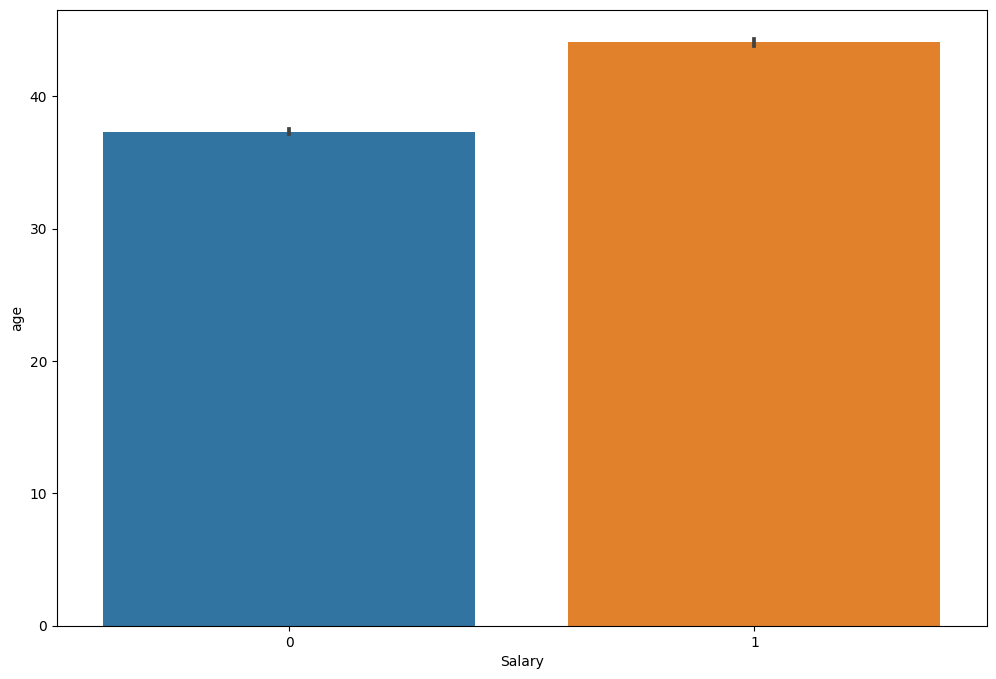

In [32]:
plt.figure(figsize=(12,8))
plt.xlabel("Salary")
plt.ylabel("Frequency of Age")
plt.yscale('linear')
sns.barplot(data=df_train,x = df_train['Salary'],y = df_train['age'])
plt.show()

In [33]:
print("Minimum Age of an Employee get less than 50 k",df_train[df_train['Salary'] == 0]['age'].min())
print("Maximum Age of an Employee get less than 50 k",df_train[df_train['Salary'] == 0]['age'].max())
print("\n")
print("Minimum Age of an Employee get more than 50 k",df_train[df_train['Salary'] == 1]['age'].min())
print("Maximum Age of an Employee get more than 50 k",df_train[df_train['Salary'] == 1]['age'].max())

Minimum Age of an Employee get less than 50 k 17
Maximum Age of an Employee get less than 50 k 90


Minimum Age of an Employee get more than 50 k 19
Maximum Age of an Employee get more than 50 k 90


In [34]:
# Splitting the into X_train and Y_train where X_train is independents varables and y_train is dependent variable
X_train = df_train.iloc[:,:-1]
X_train
y_train = df_train.iloc[:,-1]
y_train

0        0
1        0
2        0
3        0
4        0
        ..
30154    1
30155    0
30156    0
30158    0
30160    1
Name: Salary, Length: 26903, dtype: int32

In [35]:
X_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,0.0,0.0,13,0.0,0.0,0.0,0.0,1.0,2174,0,40,1
1,50,1.0,0.0,13,1.0,1.0,1.0,0.0,1.0,0,0,13,1
2,38,2.0,1.0,9,2.0,2.0,0.0,0.0,1.0,0,0,40,1
3,53,2.0,2.0,7,1.0,2.0,1.0,1.0,1.0,0,0,40,1
4,28,2.0,0.0,13,1.0,3.0,2.0,1.0,0.0,0,0,40,2


In [36]:
from sklearn.svm import SVC

model = SVC(C=15,gamma=50)

In [37]:
model.fit(X_train,y_train)

SVC(C=15, gamma=50)

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

0.978069360294391
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     20023
           1       1.00      0.91      0.96      6880

    accuracy                           0.98     26903
   macro avg       0.99      0.96      0.97     26903
weighted avg       0.98      0.98      0.98     26903



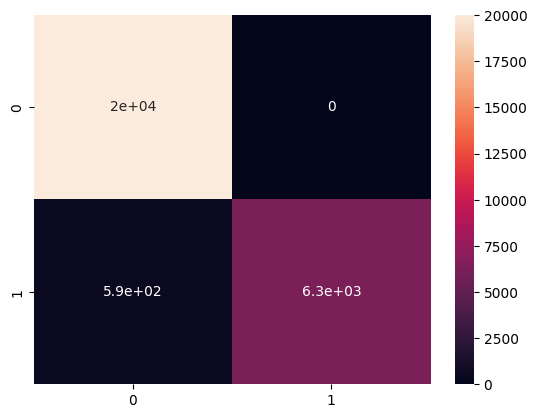

In [39]:
print(accuracy_score(y_train,model.predict(X_train)))
sns.heatmap(confusion_matrix(y_train,model.predict(X_train)),annot=True)
print(classification_report(y_train,model.predict(X_train)))

In [40]:
df_train['Salary'].value_counts()

Salary
0    20023
1     6880
Name: count, dtype: int64

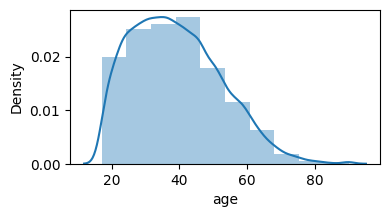

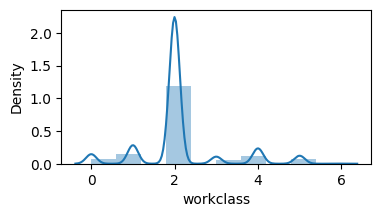

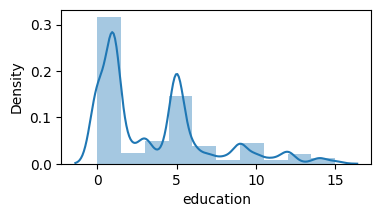

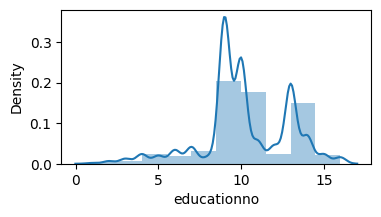

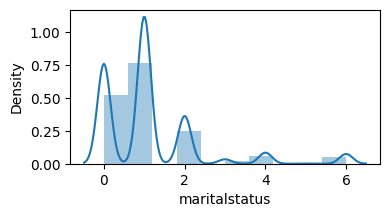

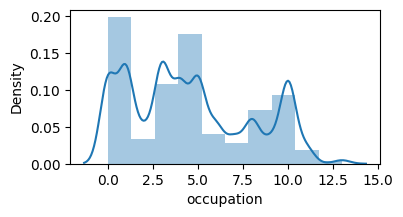

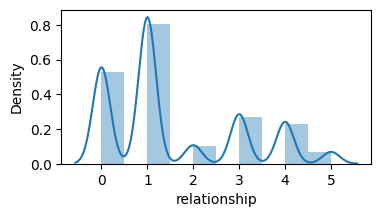

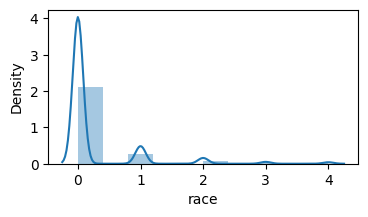

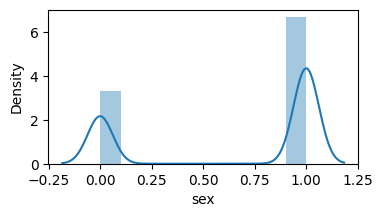

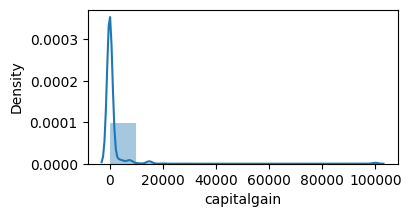

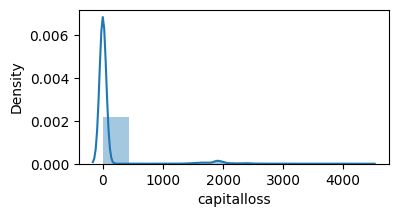

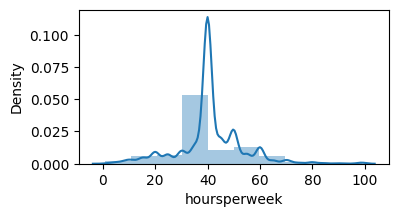

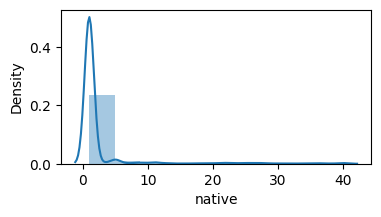

In [41]:
#Checking the disrtibution of each columns

for col in X_train.columns:
    plt.figure(figsize=(4,2))
    sns.distplot(X_train[col],bins=10,)

In [42]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,0.0,0.0,13,0.0,0.0,0.0,0.0,1.0,2174,0,40,1,0
1,50,1.0,0.0,13,1.0,1.0,1.0,0.0,1.0,0,0,13,1,0
2,38,2.0,1.0,9,2.0,2.0,0.0,0.0,1.0,0,0,40,1,0
3,53,2.0,2.0,7,1.0,2.0,1.0,1.0,1.0,0,0,40,1,0
4,28,2.0,0.0,13,1.0,3.0,2.0,1.0,0.0,0,0,40,2,0


In [43]:
# Scaling the Data

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

df_X_scale = pd.DataFrame(scale.fit_transform(X_train),columns=X_train.columns)

In [44]:
df_X_scale.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,-0.003726,-2.168556,-1.001913,1.089919,-0.892812,-1.339353,-1.050350,-0.364753,0.705589,0.122810,-0.23133,-0.094323,-0.251673
1,0.830329,-1.145556,-1.001913,1.089919,-0.097944,-1.044901,-0.364653,-0.364753,0.705589,-0.155722,-0.23133,-2.281121,-0.251673
2,-0.079549,-0.122556,-0.719798,-0.436737,0.696924,-0.750450,-1.050350,-0.364753,0.705589,-0.155722,-0.23133,-0.094323,-0.251673
3,1.057799,-0.122556,-0.437682,-1.200065,-0.097944,-0.750450,-0.364653,1.191870,0.705589,-0.155722,-0.23133,-0.094323,-0.251673
4,-0.837781,-0.122556,-1.001913,1.089919,-0.097944,-0.455999,0.321044,1.191870,-1.417255,-0.155722,-0.23133,-0.094323,-0.070588


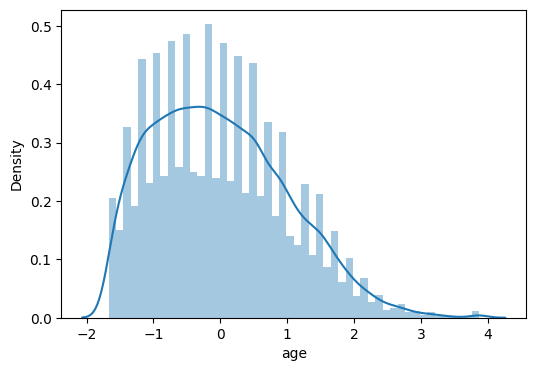

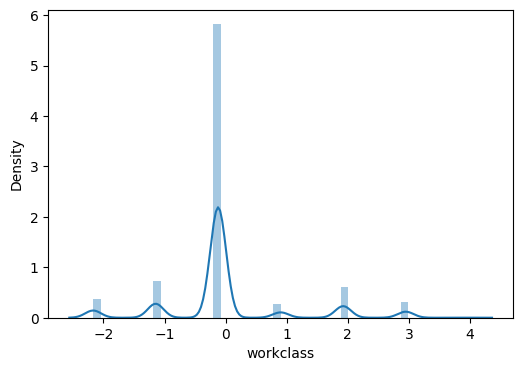

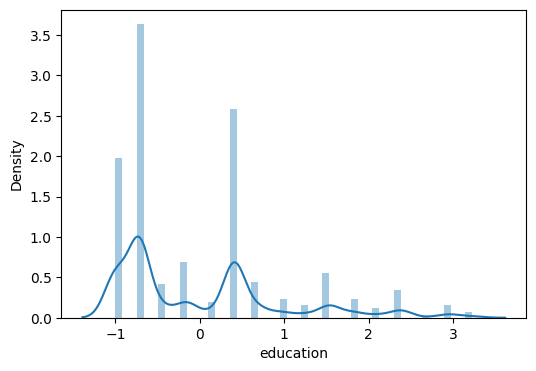

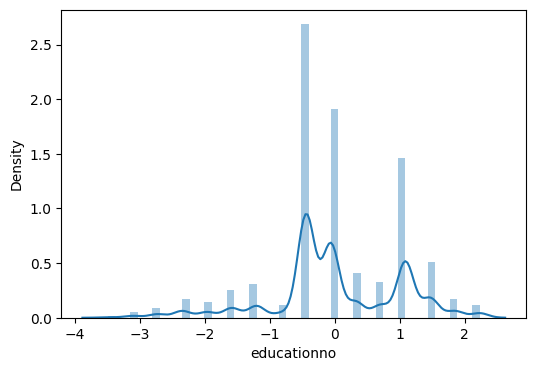

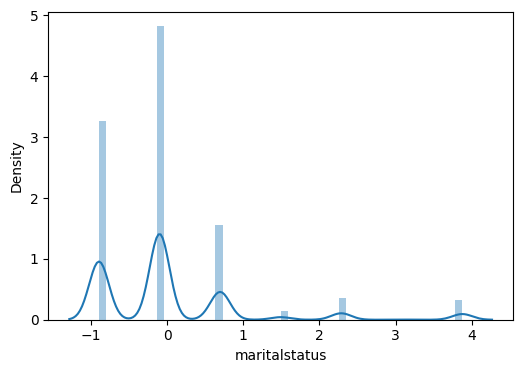

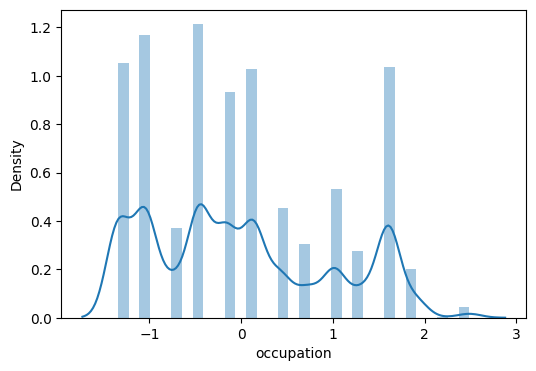

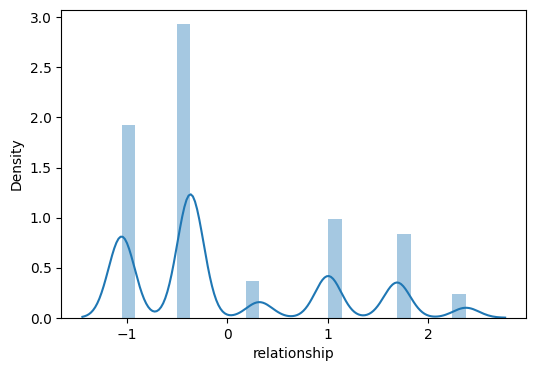

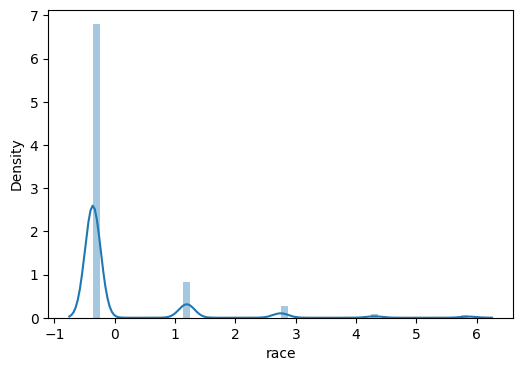

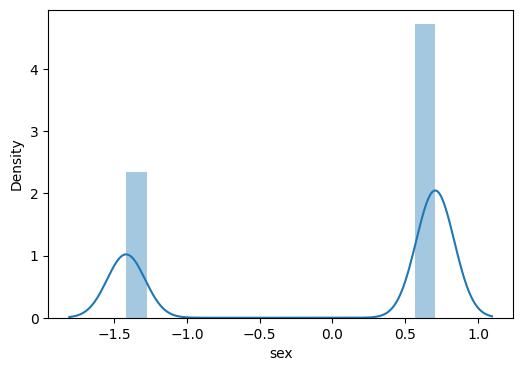

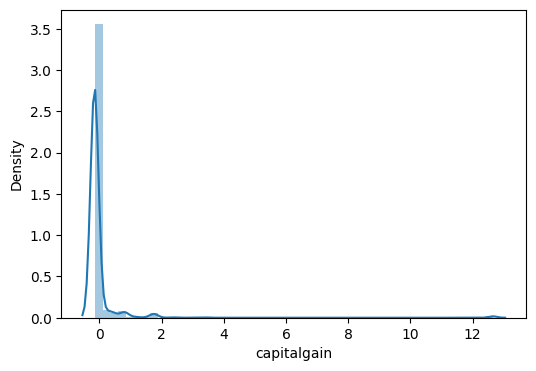

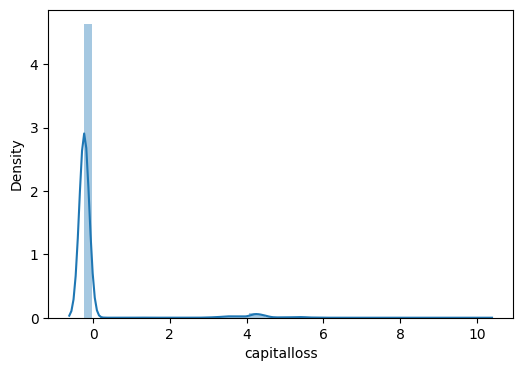

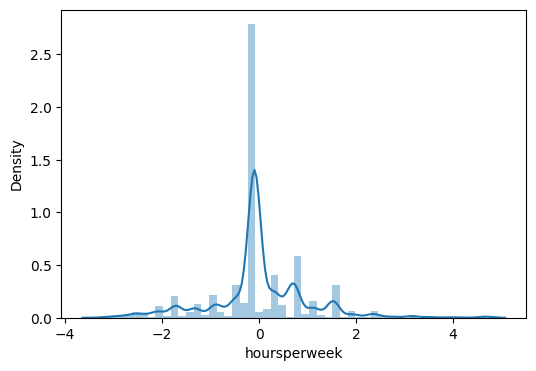

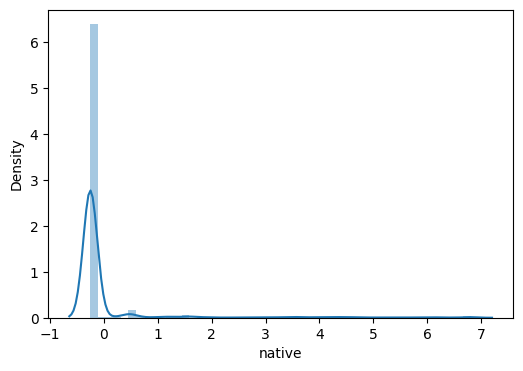

In [45]:
# Checking the Distribution after Scaling

for col in df_X_scale:
    plt.figure(figsize=(6,4))
    sns.distplot(df_X_scale[col])


In [46]:
# Creating Model of Scaled Data
model_scaled = model.fit(df_X_scale,y_train)
model_scaled

SVC(C=15, gamma=50)

0.9778091662639854
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     20023
           1       0.97      0.94      0.96      6880

    accuracy                           0.98     26903
   macro avg       0.98      0.97      0.97     26903
weighted avg       0.98      0.98      0.98     26903



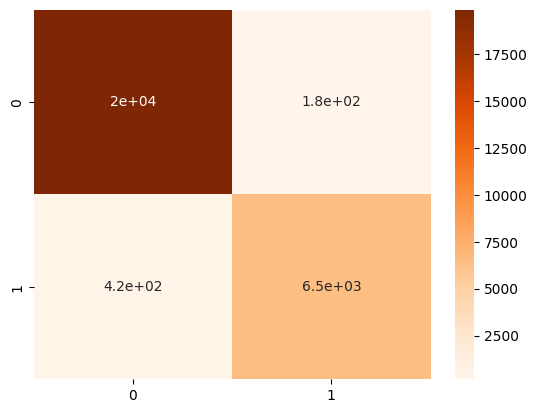

In [47]:
print(accuracy_score(y_train,model_scaled.predict(df_X_scale)))
sns.heatmap(confusion_matrix(y_train,model_scaled.predict(df_X_scale)),annot=True,cmap='Oranges')
print(classification_report(y_train,model_scaled.predict(df_X_scale)))

# Testing the model on Testing Dataset

In [65]:
 # Reading the Testing Dataset

df_test = pd.read_csv("SalaryData_Test(1).csv")
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [66]:
df_test.shape

(15060, 14)

In [67]:
# Ckhecking Null Vlaues in the datasset

df_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [68]:
# Checking the description of Numberical Column
df_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [69]:
df_test[df_test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [70]:
df_test = df_test.drop_duplicates()

In [71]:
df_test.shape

(14130, 14)

In [72]:
# Encoding the Categorical Value onto numerical

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder

In [73]:
# Encoding Sex column using OneHotEncoder

encod = OneHotEncoder(sparse_output=False,handle_unknown="ignore",drop='first')
df_test['sex'] = encod.fit_transform(df_test[['sex']])
df_test['sex'].value_counts()

sex
1.0    9455
0.0    4675
Name: count, dtype: int64

In [76]:
df_test['workclass'].unique()

array([' Private', ' Local-gov', ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [77]:
# Encoding workclass column using OrdinalEncoder

ord_encode = OrdinalEncoder(categories=[[' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay']])

df_test['workclass'] = ord_encode.fit_transform(df_test[['workclass']])
df_test['workclass'].value_counts()

workclass
2.0    10138
1.0     1279
4.0     1017
0.0      664
5.0      565
3.0      460
6.0        7
Name: count, dtype: int64

In [78]:
# Encoding the output Column using Label Encoder

lab_encoder = LabelEncoder()
df_test['Salary'] = lab_encoder.fit_transform(df_test['Salary'])
df_test['Salary'].value_counts()

Salary
0    10620
1     3510
Name: count, dtype: int64

In [79]:
# Encoding relationship and maritalstatus

rel_encode = OrdinalEncoder(categories=[[' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative']])

df_test['relationship'] = rel_encode.fit_transform(df_test[['relationship']])

marital_encode = OrdinalEncoder(categories=[[' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed']])
df_test['maritalstatus'] = marital_encode.fit_transform(df_test[['maritalstatus']])

In [80]:
# Encoding Educationa and Occupation column

edu_encode = OrdinalEncoder(categories=[[' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th']])
df_test['education'] = edu_encode.fit_transform(df_test[['education']])

occu_encoder = OrdinalEncoder(categories=[[' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv']])
df_test['occupation'] = occu_encoder.fit_transform(df_test[['occupation']])

# Map function is used to map the data through custom values
# like i have assign canada as 40 which is at the 9th postion

df_test['native'] = df_test['native'].map({' United-States':1, ' Cuba':2, ' Jamaica':3, ' India':4, ' Mexico':5,
       ' Puerto-Rico':6, ' Honduras':7, ' England':8, ' Canada':40, ' Germany':9,
       ' Iran':10, ' Philippines':11, ' Poland':12, ' Columbia':13, ' Cambodia':14,
       ' Thailand':15, ' Ecuador':16, ' Laos':17, ' Taiwan':18, ' Haiti':19, ' Portugal':20,
       ' Dominican-Republic':21, ' El-Salvador':22, ' France':23, ' Guatemala':24,
       ' Italy':25, ' China':26, ' South':27, ' Japan':28, ' Yugoslavia':29, ' Peru':30,
       ' Outlying-US(Guam-USVI-etc)':31, ' Scotland':32, ' Trinadad&Tobago':33,
       ' Greece':34, ' Nicaragua':35, ' Vietnam':36, ' Hong':37, ' Ireland':38,
       ' Hungary':39})



In [81]:
# Encoding of race column

col_ord = OrdinalEncoder(categories=[[' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other']])

df_test['race'] = col_ord.fit_transform(df_test[['race']])

In [82]:
# Spliting the data into x_test,y_test

X_test = df_test.iloc[:,:-1]
X_test
y_test = df_test.iloc[:,-1]
y_test

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 14130, dtype: int32

In [83]:
X_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2.0,2.0,7,0.0,8.0,3.0,1.0,1.0,0,0,40,1
1,38,2.0,1.0,9,1.0,7.0,1.0,0.0,1.0,0,0,50,1
2,28,4.0,6.0,12,1.0,11.0,1.0,0.0,1.0,0,0,40,1
3,44,2.0,5.0,10,1.0,8.0,1.0,1.0,1.0,7688,0,40,1
4,34,2.0,12.0,6,0.0,4.0,0.0,0.0,1.0,0,0,30,1


In [85]:
X_test.shape

(14130, 13)

In [86]:
accuracy_score(y_test,model.predict(X_test))

0.7515923566878981